In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os 
import sys
import time

In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test)=fashion_mnist.load_data()
x_valid,x_train=x_train_all[:5000],x_train_all[5000:]
y_valid,y_train=y_train_all[:5000],y_train_all[5000:]

print(x_train_all.shape,y_train_all.shape)
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

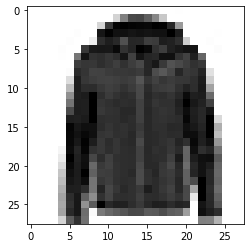

In [4]:
def show_signal_image(img_arr):
    plt.imshow(img_arr,cmap='binary')
    plt.show()
show_signal_image(x_train[0])

In [5]:
class_names = ['T-shirt','trousers','pullover','dress','coat',
               'Sandals','Shirts','Sneakers','Bags','Boots']

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled=scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled=scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [7]:
model=keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(x_train_scaled,y_train,epochs=20,
          validation_data=(x_valid_scaled,y_valid))

Epoch 1/20
1719/1719 [==============================] - 6s 2ms/step - loss: 0.7412 - accuracy: 0.7345 - val_loss: 0.4735 - val_accuracy: 0.8340
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4467 - accuracy: 0.8400 - val_loss: 0.3845 - val_accuracy: 0.8670
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3817 - accuracy: 0.8623 - val_loss: 0.3444 - val_accuracy: 0.8812
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3467 - accuracy: 0.8746 - val_loss: 0.3423 - val_accuracy: 0.8736
Epoch 5/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3209 - accuracy: 0.8840 - val_loss: 0.3175 - val_accuracy: 0.8868
Epoch 6/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3004 - accuracy: 0.8910 - val_loss: 0.2928 - val_accuracy: 0.8948
Epoch 7/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2853 - accuracy: 0.8966 - val_loss: 0.3040 - val_accuracy:

In [8]:
test_loss, test_acc = model.evaluate(x_test_scaled, y_test)
print('测试损失：%f 测试准确率: %f' % (test_loss, test_acc))

313/313 [==============================] - 0s 1ms/step - loss: 0.2632 - accuracy: 0.9050
测试损失：0.263232 测试准确率: 0.905000


In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [10]:
pd.DataFrame([acc, val_acc, loss, val_loss], index=['acc', 'val_acc', 'loss', 'val_loss']).T.to_csv('Indicator_mnist.csv')

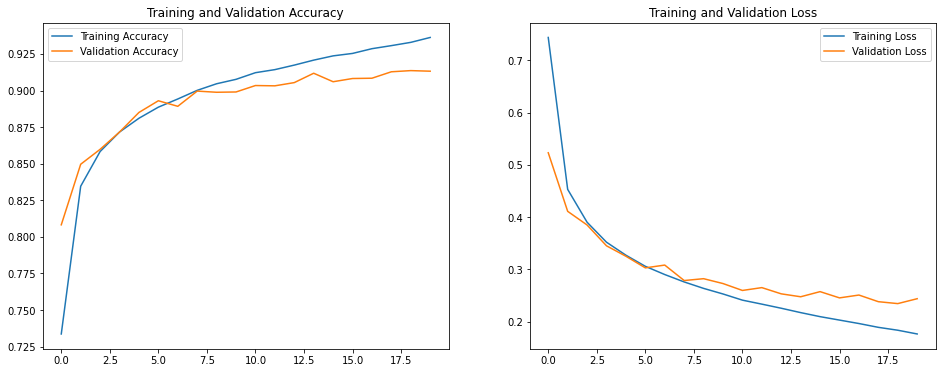

In [32]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [11]:
model.save('fashion_model.h5')

## predict

In [2]:
model_ = keras.models.load_model('fashion_model.h5')

In [13]:
model_.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [21]:
predictions = model.predict(x_test_scaled)

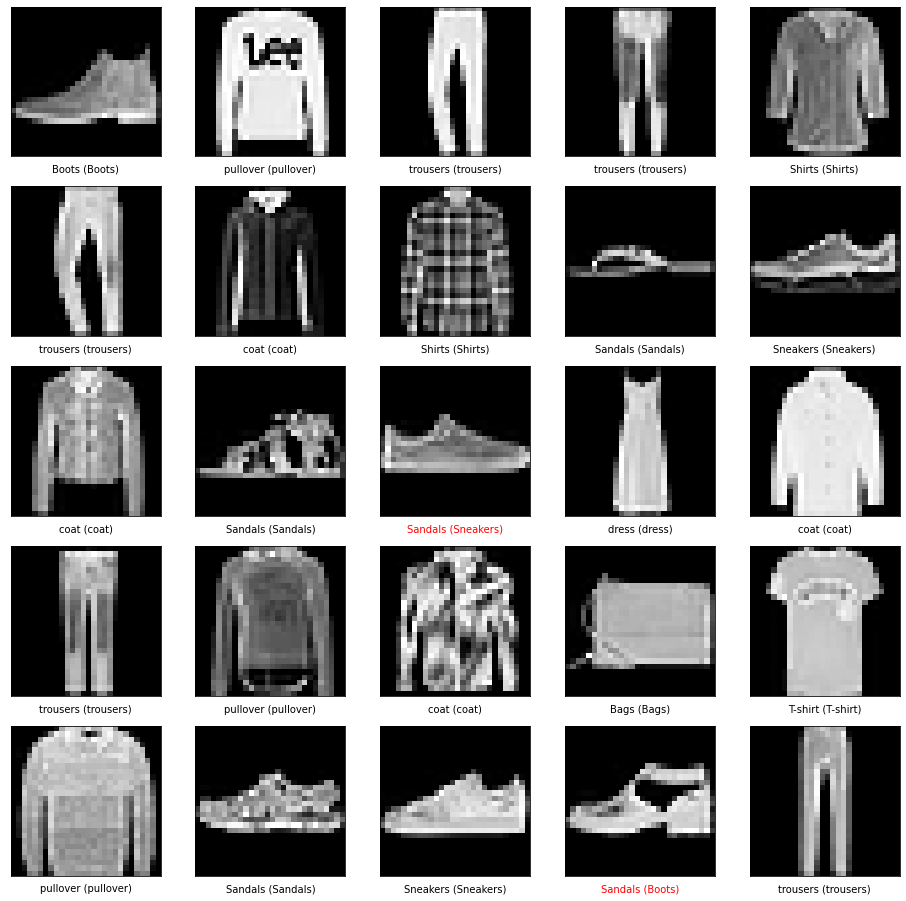

In [24]:
# 保存画布的图形，宽度为10，长度为10
plt.figure(figsize=(16,16))

# 预测25张图片是否准确，不准确为红色，准确为蓝色
for i in range(25):
    # 创建分布 5 * 5 个图形
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.gray()

    # 显示图片，以cm为单位
    plt.imshow(x_test_scaled[i])

    # 预测的图片是否正确，黑色底表示预测正确，红色底表示预测失败
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'black'
    else:
        color = 'red'

    pre = class_names[predicted_label]
    tar = class_names[y_test[i]]
    plt.xlabel("{} ({})".format(pre, tar), color=color)
plt.show()

-----

In [2]:
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler

In [4]:
import matplotlib.pyplot as plt

C:\Users\PC\AppData\Local\Temp\ipykernel_15876\907712736.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im=im.resize((28,28),Image.ANTIALIAS)


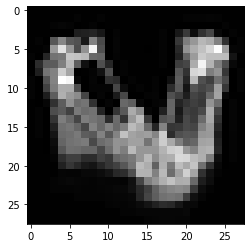

In [6]:
scaler=StandardScaler()
im = Image.open('./img.jpg')             
im=im.resize((28,28),Image.ANTIALIAS)
L = im.convert('L')
plt.imshow(L, cmap='binary')
plt.show(L)
im2 = np.array(L)
im2=np.array([255 - im2])
im3=scaler.fit_transform(im2.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

C:\Users\PC\AppData\Local\Temp\ipykernel_8544\2852237567.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im=im.resize((28,28),Image.ANTIALIAS)


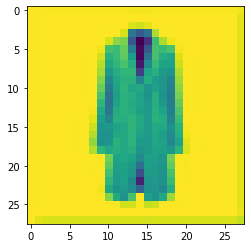

[1.5064931e-04 3.9805798e-03 1.5138712e-04 2.3005137e-03 9.8576593e-01
 7.3900890e-05 2.7301277e-05 4.9581318e-05 7.3778615e-03 1.2223408e-04]
预测的图片为：coat


In [4]:
y=model_.predict(im3)
class_names = ['T-shirt','trousers','pullover','dress','coat',
               'Sandals','Shirts','Sneakers','Bags','Boots']
print(y[0])
print('预测的图片为：%s'%class_names[np.argmax(y[0])])